# Instalation de QGIS

## Qu'est-ce-que QGIS ?


GQIS est un système d'information géographique libre et open source.
Il permet de créer, éditer, visualiser, analyser et publier des données géospatiales.
<br>Voici un apperçu de l'application :
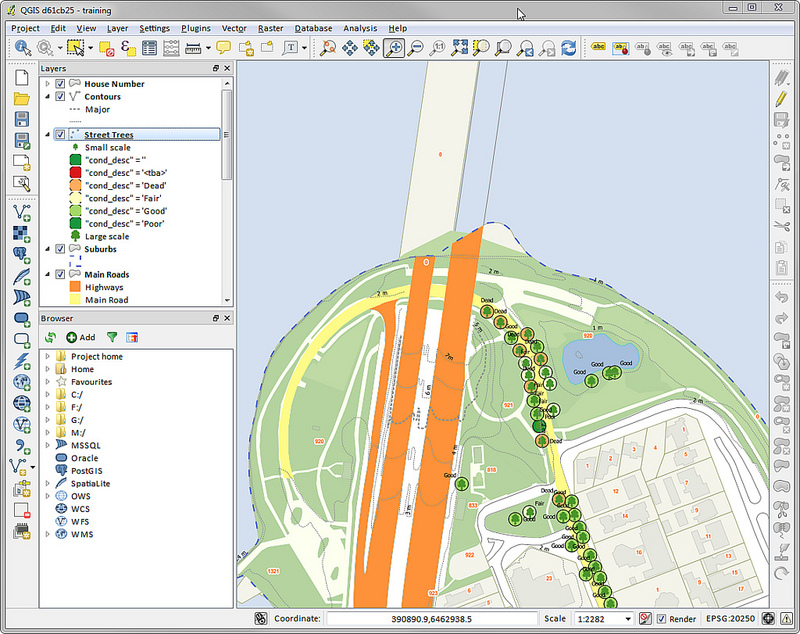

## Instalation


Si vous êtes sous linux (debian ubuntu) :

In [ ]:
!sudo apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 51F523511C7028C3
!sudo add-apt-repository "deb https://qgis.org/debian-ltr/ `lsb_release -c -s` main"
!sudo apt-get update
!sudo apt-get install opencl-headers ocl-icd-opencl-dev
!sudo apt-get install qgis python3-qgis qgis-plugin-grass

## Utilisation

# <center>Analyse de données en Python</center>

## I - Lecture des données

Pour la lecture et le travail sur les données, nous utilisons souvent la bibliothèque `Pandas`de python.
Pour aller plus loin vous pouvez :

*   lire le guide d'utilisation [Pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html)
*   consulter la documentation [Pandas documentation](https://pandas.pydata.org/docs/reference/index.html)




In [ ]:
#insatllation de la bibliothèque pandas
!pip install pandas

In [ ]:
#importation de la bibliothèque pandas
import pandas as pd

### BD TOPO
#### Domaines et Tables

Chaque table a **5** fichiers associés:  

Les fichiers associés à un Shapefile (un format de fichier géospatial largement utilisé) ont différentes extensions et rôles. Voici une brève explication de chacun :

**.dbf** : La table attributaire qui stocke les données attributaires associées à chaque forme géométrique. C'est un format de base de données tabulaire qui peut être ouvert avec des programmes comme Excel.

**.shp** : Le fichier principal qui stocke la géométrie (points, lignes, polygones, etc.).

**.shx** : L'index spatial qui agit comme un fichier d'index pour accélérer l'accès aux formes géométriques du fichier .shp.

**.prj** : Le fichier de projection qui contient des informations sur le système de coordonnées de référence et la projection cartographique utilisés.

**.cpg** : Le fichier de codage de caractères qui spécifie le jeu de caractères utilisé dans le fichier. Cela peut être important pour les caractères spéciaux et les langues autres que l'anglais.

Ces fichiers forment ensemble un ensemble complet de données géospatiales, permettant de stocker à la fois la géométrie et les attributs associés à cette géométrie, tout en prenant en compte des informations telles que la projection et le codage des caractères.

Pour lire les données de la BD TOPO, nous devons procéder un peu différement de d'habitude.
Nous allons utiliser en plus de la bibliothèque `Pandas`, la bibliothèque [Géopandas](https://geopandas.org/en/stable/docs.html).

Nous allons définir une fonction pour lire les données situées dans la BD TOPO car les fichiers de données sont en format dbf.

In [ ]:
#instalation de la bibliothèque
!pip install dbfread

#### Exemple simple

In [ ]:
import geopandas as gpd #importation de la bibliothèque

def conv_df(chemin):
  # Spécifiez le chemin vers votre fichier DBF
  chemin_fichier_dbf = chemin

  # Utilisez la fonction DBF() pour lire le fichier
  table_dbf = DBF(chemin_fichier_dbf)

  # Spécifiez l'encodage utilisé par votre fichier DBF (par exemple, Latin-1 ou UTF-8)
  encodage_dbf = 'utf-8'

  # Utilisez la fonction DBF() en spécifiant l'encodage
  table_dbf = DBF(chemin_fichier_dbf, encoding=encodage_dbf)

  # Convertissez la table en un DataFrame pandas
  dataframe_pandas = pd.DataFrame(iter(table_dbf))
  gdf = gpd.GeoDataFrame(dataframe_pandas)


  return gdf

In [ ]:
#Pensez à renseigner votre chemin d'accès à la TOPO et le fichier de données à lire
chemin_donnees = "/content/LIEU_DIT_NON_HABITE.dbf"
df_lieu_dit=conv_df(chemin_donnees)

df_lieu_dit.head()#Pour afficher les 5 premières lignes

#### Exploration des Batiments

In [ ]:
from os import listdir
from os.path import isfile, join

In [ ]:
Chemin_Donnees_BDTOPO : str = "/DonneesBDTopoCompletes/BDTOPO/"

In [ ]:
#Organisation de la BD en domaines

DataPath = Chemin_Donnees_BDTOPO

# on récupère la liste des dossiers
Domaines = [f for f in listdir(DataPath) if not isfile(join(DataPath, f))]

# on récupère tous les fichiers des tables par domaine
DBFs = {}
for dom in Domaines:
  DBF_files = {f.split('.')[0]:f for f in listdir(DataPath+dom) if f.endswith('.dbf')}
  DBFs[dom]=DBF_files

# Parcourir les éléments du dictionnaire (affichage des différents domaines)
for dom, tables in DBFs.items():
  print(f"Domaine {dom}:")
  print("  Tables:", [fichier for fichier in tables])

In [ ]:
def nom_f(domaine:str, table:str):
  """
  BUT: renvoie le chemin absolu du fichier .gdf d'un domaine et table donnés
  IN:  -domaine: domaine de la BD TOPO
       -table: table de la BD TOPO
       DataPath est une constante globale
  """
  fichier_table =  DBFs[domaine][table]
  return DataPath + domaine + '/' + fichier_table

In [ ]:
#choix du domaine (ici Batiment alias BATI)
domaineChoisi = "BATI"
print("Tables:", [fichier for fichier in DBFs[domaineChoisi]])

In [ ]:
# Recupérer n'importe quelle table de la BDTOPO en spécifiant le Domaine et la Table
Batiment_GDF = gpd.GeoDataFrame(gpd.read_file(nom_f(domaine=domaineChoisi, table="BATIMENT")), geometry='geometry')
ConstructionLineaire_GDF = gpd.GeoDataFrame(gpd.read_file(nom_f(domaine=domaineChoisi, table="CONSTRUCTION_LINEAIRE")), geometry='geometry')
ConstructionPonctuel_GDF = gpd.GeoDataFrame(gpd.read_file(nom_f(domaine=domaineChoisi, table="CONSTRUCTION_PONCTUELLE")), geometry='geometry')
TerrainSport_GDF = gpd.GeoDataFrame(gpd.read_file(nom_f(domaine=domaineChoisi, table="TERRAIN_DE_SPORT")), geometry='geometry')
ConstructionSurface_GDF = gpd.GeoDataFrame(gpd.read_file(nom_f(domaine=domaineChoisi, table="CONSTRUCTION_SURFACIQUE")), geometry='geometry')
Cimetiere_GDF = gpd.GeoDataFrame(gpd.read_file(nom_f(domaine=domaineChoisi, table="CIMETIERE")), geometry='geometry')
LigneOrographique_GDF = gpd.GeoDataFrame(gpd.read_file(nom_f(domaine=domaineChoisi, table="LIGNE_OROGRAPHIQUE")), geometry='geometry')
Pylone_GDF = gpd.GeoDataFrame(gpd.read_file(nom_f(domaine=domaineChoisi, table="PYLONE")), geometry='geometry')
Reservoir_GDF = gpd.GeoDataFrame(gpd.read_file(nom_f(domaine=domaineChoisi, table="RESERVOIR")), geometry='geometry')
TopoBati_GDF = gpd.GeoDataFrame(gpd.read_file(nom_f(domaine=domaineChoisi, table="TOPONYMIE_BATI")), geometry='geometry')

In [ ]:
Batiment_GDF.head()

### CSV

Pour lire un CSV avec pandas, on utilise la fonction [pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [ ]:
df = pd.read_csv('titanic.csv')
#df est un racourci pour DataFrame

In [ ]:
#Obtenir les dimensions du DataFrame
df.shape

In [ ]:
#Obtenir les noms des colonnes
list(df.columns)

In [ ]:
#Résumé statistique des données pour chaque colonnes (variables/features)
df.describe().T

In [ ]:
# fonction pour obtenir une table avec les valeurs manquantes et le poucentage qu'elles représentent
def missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() /
               df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent],
                             axis=1,
                             keys=['Total', 'Pourcentage'])
    return missing_data


In [ ]:
# Analyser les données manquantes
missing_data_table(df)

In [ ]:
# Filtrer une colonne avec une condition
df[df.Age > 70] #ici, on veut garder les lignes où l'age du passager est suppérieur à 70.

df[df["Embarked"].isnull() == True] #ici on veut identifier les lignes pour lequelles ont a un NaN dans la colonne Embarked

In [ ]:
#affiche le nombre de valeurs uniques pour chaque colonnes
df.nunique()

In [ ]:
#Retourne le nombre d'individus par modalités de la variable Sex
df["Sex"].value_counts()

## II - Statistiques descriptives

Dans cette partie, on va utiliser des graphiques générés avec matplotlib et seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

### Univarié

L'analyse univariée se concentre sur les variables séparément les unes des autres.

In [ ]:
#diagrammes en barre pour les variables qualitatives et histogrammes pour les variables quantitatives
#pour afficher tous les graphiques sur la même fenetre, on utilise subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
sb.countplot(x='Survived', data=df, ax=axes[0, 0])
sb.countplot(x='Pclass', data=df, ax=axes[0, 1])
sb.countplot(x='Sex', data=df, ax=axes[0, 2])
sb.countplot(x='SibSp', data=df, ax=axes[0, 3])
sb.countplot(x='Parch', data=df, ax=axes[1, 0])
sb.countplot(x='Embarked', data=df, ax=axes[1, 1])
sb.histplot(df['Fare'], kde=True, ax=axes[1, 2])
sb.histplot(df['Age'].dropna(), kde=True, ax=axes[1, 3])
plt.show()

In [ ]:
#à vous ! Essayer d'interpréter

### Bivarié

L'analyse bivariée prend en compteles interractions entre deux variables.

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sb.countplot(x="Survived", hue="Sex", data=df,
             ax=axes[0, 0]).set(xticklabels=["Died", "Survived"])
sb.boxplot(x="Survived", y="Age", data=df,
           ax=axes[0, 1]).set(xticklabels=["Died", "Survived"])
sb.violinplot(data=df,
              x='Pclass',
              y='Age',
              hue='Survived',
              split=True,
              ax=axes[1, 0])
sb.pointplot(x="Pclass",
             y="Survived",
             hue="Sex",
             palette={
                 "male": "g",
                 "female": "m"
             },
             markers=["^", "o"],
             linestyles=["-", "--"],
             data=df,
             ax=axes[1, 1])
plt.show()


In [ ]:
ax = sb.FacetGrid(df, col="Survived", height=5, aspect=2)
ax = ax.map(sb.histplot, "Age", kde=True)

In [ ]:
#table de contingence et test d'indépendances du khi2
table = pd.crosstab([df['Survived']], df['Sex'])
chi2, p, dof, ex = stats.chi2_contingency(table.values)
print(chi2, p)

### Multivarié

L'analyse multivariée prend en compte toutes les variables

In [ ]:
#Matrice de corrélation
corr = df[["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]].corr()
plt.figure(figsize=(12, 10))
ax = sb.heatmap(corr, cmap='RdYlGn', linewidths=1, annot=True)

## III - Visualisation

Même si les cartes vont être réaliser à partir de QGIS, il se peut qu'on ait à réaliser d'autres types de visualisation.
Cette section sert à vous montrer quelques exemples de graphiques typiques dans python.
Dans le cadre du projet, nous allons utiliser plotly. L'avantage de plotly c'est qu'elle produit des graphiques interractifs!

In [4]:
import plotly.express as px

### 1. Nuage de point

In [5]:
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 size='petal_length', hover_data=['petal_width'],color_discrete_sequence=px.colors.qualitative.Light24)
fig.show()

####  Changement des couleurs

In [6]:
fig = px.scatter(df, x='sepal_width', y='sepal_length',
              color='species', color_discrete_map={'setosa': 'lightcyan',
                                                   'versicolor': 'darkcyan', 'virginica': 'darkgreen'})
fig.show()

### 2. Nuage de points avec une echelle de couleurs

In [ ]:
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color='petal_length')
fig.show()

### 3. ACP en 3D

In [ ]:
from sklearn.decomposition import PCA

df = px.data.iris()
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['species'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

### 4. ACP en 2D

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

df = px.data.iris()
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df['species'])
fig.show()

### 5. Courbes avec markers

In [ ]:
import plotly.express as px
df = px.data.gapminder().query("continent == 'Oceania'")
fig = px.line(df, x='year', y='lifeExp', color='country', markers=True)
fig.show()

### 6. Courbe de séries chronoloiques

In [ ]:
import plotly.express as px

df = px.data.stocks()
fig = px.line(df, x='date', y="GOOG")
fig.show()

### 7. Régression linéaire avec courbe de tendance

In [ ]:
df = px.data.tips()
fig = px.scatter(df, x="total_bill", y="tip", trendline="ols")
fig.show()

### 8. Diagramme en bâtons supperposés

In [ ]:
import plotly.express as px

long_df = px.data.medals_long()

fig = px.bar(long_df, x="nation", y="count", color="medal", title="Long-Form Input")
fig.show()

### 9. Diagramme en bâton avec 2 labels (juxtaposé)

In [ ]:
import plotly.graph_objects as go
animals=['giraffes', 'orangutans', 'monkeys']

fig = go.Figure(data=[
    go.Bar(name='SF Zoo', x=animals, y=[20, 14, 23]),
    go.Bar(name='LA Zoo', x=animals, y=[12, 18, 29])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

### 10. Diagramme en bâton classique

In [ ]:
import plotly.express as px
data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(data_canada, x='year', y='pop')
fig.show()

### 11. Boîte à moustache

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.box(df, x="time", y="total_bill")
fig.show()

### 12. Boxplot with underlyting data

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.box(df, x="time", y="total_bill", points="all")
fig.show()

### 13. DistPLots

In [ ]:
import plotly.figure_factory as ff
import numpy as np

# Add histogram data
x1 = np.random.randn(200) - 2
x2 = np.random.randn(200)
x3 = np.random.randn(200) + 2
x4 = np.random.randn(200) + 4

# Group data together
hist_data = [x1, x2, x3, x4]

group_labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

### 14. Heatmap

Souvent utilisées pour représenter la matrice de corrélation.
(Dans cette exemple ce n'est pas une matrice de corrélation)

In [ ]:
import plotly.express as px
data=[[1, 25, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, 5, 20]]
fig = px.imshow(data,
                labels=dict(x="Day of Week", y="Time of Day", color="Productivity"),
                x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
                y=['Morning', 'Afternoon', 'Evening']
               )
fig.update_xaxes(side="top")
fig.show()